<a href="https://colab.research.google.com/github/idnunez/MAT-421/blob/main/ModuleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT421 Module D

Isaac Nunez

**Section 1.1: Introduction**

Linear algebra is an area of mathematics that is essential to the fields of computing, data science, and more.

While simple linear algebra problems can be solved using traditional methods, programming languages such as python have simplified these computations, allowing us to handle large amounts of data easily.

In [2]:
import numpy as np

A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

#Calculates the dot product of the two matrices using the numpy library
print(np.dot(A,B))

[[19 22]
 [43 50]]


**Section 1.2: Elements of Linear Algebra**

Section 1.2.1: Linear Combinations

A linear combination of a set of arrays is a set of arrays that can be created with a sum of a subset of arrays multiplied by some constant.

A linear space is defined as a set of vectors that is closed by vector addition and scalar multiplication for a particular basis.

The span of a basis is a set that contains all vectors that can be formed by a linear combination of the vectors in the basis. This is represented as:

$span(w_{1},...w_{m}) = \{\sum_{j=1}^{m}a_{j}w_{j}:a_{1},...a_{j}\in\mathbb{R}\}$

Linear Independence:

A set of vectors is considered to be linearly independent if none of the members of the set are a linear combination of the other vectors in the set. For example, the basis (1,0), (0,1), (1,1) is not linearly independent because the vector (1,1) is a linear combination of 1*(1,0) + 1*(0,1).



In [3]:
A = np.array([1,0])
B = np.array([0,1])

A + B

array([1, 1])

**Section 1.2.2: Orthogonality**

Orthonormal Bases

Orthonormal bases are typically used to simplify applications of linear algebra by putting bases in a basic form.


A basis is considered orthonormal if each vector in the basis is pairwise orthogonal to every other vector in the basis and has a norm of 1.

In [4]:
A = np.array([1/np.sqrt(2),0,1/np.sqrt(2)])
B = np.array([0,1,0])

#A vector is normal if it's norm is one.
print(np.linalg.norm(A))
print(np.linalg.norm(B))

#Two vectors are orthogonal if their dot product is zero.
print(np.dot(A,B))

0.9999999999999999
1.0
0.0


Gram-Schmidt Process

One method for finding an orthonormal basis is the Gram-Schmidt process. It is based on the principle that if a basis $span(a_{1},...a_{m})$ exists in $\mathbb{R}^{n}$, there then exists an orthonormal basis $q_{1},...q_{m}$ that spans the same subspace.

The Gram-Schmidt process involves replacing vectors in the original orthogonal projection of the basis to create an orthonormal basis.

Eigenvalues and Eigenvectors

An eigenvalue of a matrix A is a value $\lambda$ such that

$Ax = \lambda x$

Where A is an nxn non-zero vector, x is a non-zero nx1 vector, and $\lambda$ is a constant. All vectors x that satisfy this condition are considered to be the corresponding eigenvectors.

In [5]:
#Finding the eigenvalues and eigenvectors of a matrix

A = np.array([[3,2,5],[4,2,6],[0,1,9]])

#Calling the eig function from numpy.linalg
evals, evectors = np.linalg.eig(A)

print("Eigenvalues of A are: ", evals)
print("Eigenvectors of A are: ", evectors)

Eigenvalues of A are:  [-0.37715862  4.14667149 10.23048713]
Eigenvectors of A are:  [[ 0.39648204  0.63790933  0.54545017]
 [-0.91286635  0.754267    0.65043541]
 [ 0.09735    -0.15541231  0.52859993]]


**Section 1.3: Linear Regression**

Linear Regression is a method of finding a trend in a set of data by approximating a linear equation that represents the overall shape of the data.

It differs from interpolation in that it does not pass through every point of data, but instead finds a line that describes the general trend of the data.

QR Decomposition

QR decomposition is a method of solving a least squares problem by decomposing the initial matrix A into a product of an orthonormal matrix Q and a triangular matrix R such that A = QR.

Instead of finding the QR factorization by hand, we can use the scipy function in order to find the decomposition.

In [8]:
import scipy
import scipy.linalg

A = np.array([[3,2,5],[4,2,6],[0,1,9]])

Q, R = scipy.linalg.qr(A)

print("A = ", A)
print("Q = ", Q)
print("R = ", R)
#Shows that A=QR
print("QR = ", np.dot(Q,R))

A =  [[3 2 5]
 [4 2 6]
 [0 1 9]]
Q =  [[-0.6         0.29711254 -0.74278135]
 [-0.8        -0.22283441  0.55708601]
 [-0.          0.92847669  0.37139068]]
R =  [[-5.         -2.8        -7.8       ]
 [ 0.          1.07703296  8.50484649]
 [ 0.          0.          2.97112541]]
QR =  [[3. 2. 5.]
 [4. 2. 6.]
 [0. 1. 9.]]


Linear Regression

The ultimate goal of a least squared problem is to find the set of parameters that minimize the error of the function with the given data set.

This method uses a matrix A constructed from a column of ones and a column containing the input data. Then, instead of solving for Ax = b, you solve for A$\beta$ = y, with $beta$ representing the coefficients for the final linear regression. By using this method, a linear regression can be approximated.

We can use python to find the linear regression of a set of points using this method.

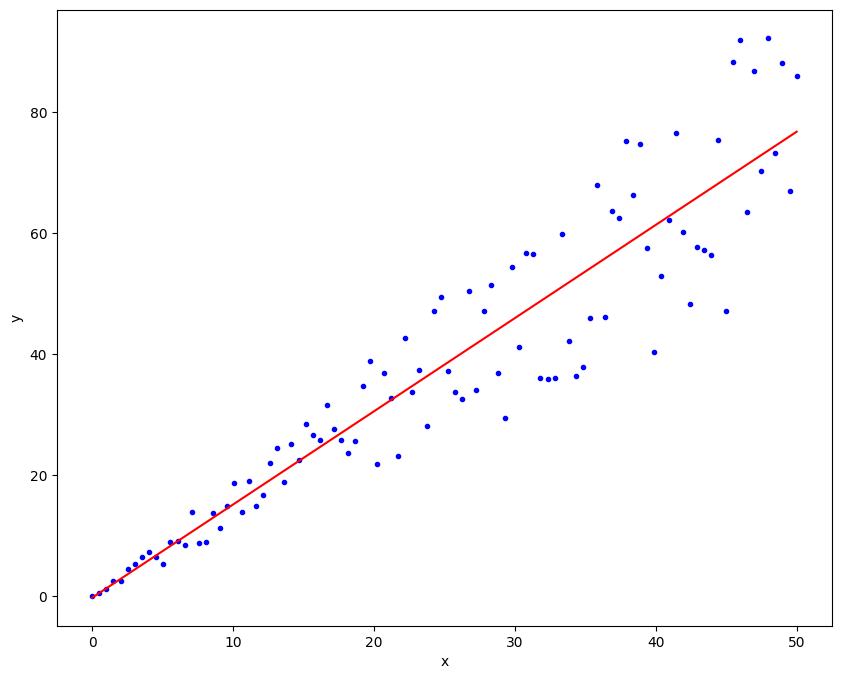

In [11]:
import matplotlib.pyplot as plt
#Generate a random set of data to make a regression

x = np.linspace(0,50,100)
y = x + x * np.random.random(len(x))

#Assemble the matrix A and the vector y
A = np.vstack([x,np.ones(len(x))]).T
y = y[:,np.newaxis]

#Find the linear regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x'); plt.ylabel('y')
plt.show()